In [1]:
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import geopandas as gp

from unidecode import unidecode

In [1]:
%config Completer.use_jedi = False

In [2]:
ideb_ai = pd.read_excel('ideb_2023_municipios_anos_iniciais.xlsx',skiprows=9)
ideb_ai 

,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2005_SI_4,VL_APROVACAO_2005_SI,VL_APROVACAO_2005_1,VL_APROVACAO_2005_2,VL_APROVACAO_2005_3,VL_APROVACAO_2005_4,...,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2007,VL_PROJECAO_2009,VL_PROJECAO_2011,VL_PROJECAO_2013,VL_PROJECAO_2015,VL_PROJECAO_2017,VL_PROJECAO_2019,VL_PROJECAO_2021
0,RO,1100015.0,Alta Floresta D'Oeste,Estadual,77.2,-,70.4,78.2,73.7,82.5,...,4.6,5.9,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.7
1,RO,1100015.0,Alta Floresta D'Oeste,Municipal,-,-,-,-,-,-,...,4.8,5.1,-,-,-,-,-,5.3,5.5,5.8
2,RO,1100015.0,Alta Floresta D'Oeste,Pública,80.9,-,73,81.5,81.1,87.9,...,4.8,5.3,3.8,4.1,4.5,4.8,5.1,5.4,5.7,5.9
3,RO,1100023.0,Ariquemes,Estadual,87.1,-,83.3,88.6,88.5,87.5,...,5.8,6.1,4.1,4.4,4.8,5.1,5.4,5.6,5.9,6.2
4,RO,1100023.0,Ariquemes,Municipal,85.7,93,79,87.3,86.1,87.4,...,4.5,5.3,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14509,que foram definidas (https://download.inep.gov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14510,federado de 2007 até 2021;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14511,"(4) Com o fim do primeiro ciclo do Ideb, o Ine...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14512,informações ver Portaria nº 26 de 29/01/2024 (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np.

## Pegando os dados de saeb de Pet - Jua e promovendo a comparação de ambos no decorrer dos anos, no fundamental 1

### 1. Retornando a lista de colunas existentes:

In [3]:
list(ideb_ai.columns)

['SG_UF',
 'CO_MUNICIPIO',
 'NO_MUNICIPIO',
 'REDE',
 'VL_APROVACAO_2005_SI_4',
 'VL_APROVACAO_2005_SI',
 'VL_APROVACAO_2005_1',
 'VL_APROVACAO_2005_2',
 'VL_APROVACAO_2005_3',
 'VL_APROVACAO_2005_4',
 'VL_INDICADOR_REND_2005',
 'VL_APROVACAO_2007_SI_4',
 'VL_APROVACAO_2007_SI',
 'VL_APROVACAO_2007_1',
 'VL_APROVACAO_2007_2',
 'VL_APROVACAO_2007_3',
 'VL_APROVACAO_2007_4',
 'VL_INDICADOR_REND_2007',
 'VL_APROVACAO_2009_SI_4',
 'VL_APROVACAO_2009_SI',
 'VL_APROVACAO_2009_1',
 'VL_APROVACAO_2009_2',
 'VL_APROVACAO_2009_3',
 'VL_APROVACAO_2009_4',
 'VL_INDICADOR_REND_2009',
 'VL_APROVACAO_2011_SI_4',
 'VL_APROVACAO_2011_SI',
 'VL_APROVACAO_2011_1',
 'VL_APROVACAO_2011_2',
 'VL_APROVACAO_2011_3',
 'VL_APROVACAO_2011_4',
 'VL_INDICADOR_REND_2011',
 'VL_APROVACAO_2013_SI_4',
 'VL_APROVACAO_2013_SI',
 'VL_APROVACAO_2013_1',
 'VL_APROVACAO_2013_2',
 'VL_APROVACAO_2013_3',
 'VL_APROVACAO_2013_4',
 'VL_INDICADOR_REND_2013',
 'VL_APROVACAO_2015_SI_4',
 'VL_APROVACAO_2015_SI',
 'VL_APROVACAO_2015_

### 2. Retornando os dados de 'NO_MUNICIPIO' de 'Juazeiro' e 'Petrolina':

In [6]:
ideb_pj = ideb_ai[(ideb_ai['NO_MUNICIPIO'] == 'Juazeiro') | (ideb_ai['NO_MUNICIPIO'] == 'Petrolina')]
ideb_pj

,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2005_SI_4,VL_APROVACAO_2005_SI,VL_APROVACAO_2005_1,VL_APROVACAO_2005_2,VL_APROVACAO_2005_3,VL_APROVACAO_2005_4,...,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2007,VL_PROJECAO_2009,VL_PROJECAO_2011,VL_PROJECAO_2013,VL_PROJECAO_2015,VL_PROJECAO_2017,VL_PROJECAO_2019,VL_PROJECAO_2021
4186,PE,2611101.0,Petrolina,Estadual,83.4,-,94,67.2,94.7,80.6,...,-,-,3.5,3.9,4.3,4.6,4.8,5.1,5.4,5.7
4187,PE,2611101.0,Petrolina,Municipal,78.1,94.2,68,68.8,78.5,83.3,...,5.7,6,3.4,3.7,4.1,4.4,4.7,5,5.3,5.6
4188,PE,2611101.0,Petrolina,Pública,80.5,94.2,80.6,68,87.1,81.8,...,5.7,6,3.5,3.8,4.2,4.5,4.8,5.1,5.4,5.7
5366,BA,2918407.0,Juazeiro,Estadual,63.5,-,47.3,61.3,70.7,71,...,-,-,2.5,2.9,3.3,3.6,3.9,4.2,4.5,4.8
5367,BA,2918407.0,Juazeiro,Municipal,67.9,-,60.1,66.4,71.1,77.1,...,5.1,5.3,2.7,3,3.4,3.7,4,4.3,4.6,4.9
5368,BA,2918407.0,Juazeiro,Pública,67.2,-,58.6,65.9,71,75.9,...,5.1,5.3,2.7,3,3.4,3.7,4,4.3,4.6,4.9


### 3. Criando a lista de keys que será usada como base para retornar os valores presentes em cada coluna

In [7]:
list_year = []
year = 2005
while(not(year>2023)):
    list_year.append(f'VL_NOTA_MATEMATICA_{year}')
    year = year + 2
list_year

['VL_NOTA_MATEMATICA_2005',
 'VL_NOTA_MATEMATICA_2007',
 'VL_NOTA_MATEMATICA_2009',
 'VL_NOTA_MATEMATICA_2011',
 'VL_NOTA_MATEMATICA_2013',
 'VL_NOTA_MATEMATICA_2015',
 'VL_NOTA_MATEMATICA_2017',
 'VL_NOTA_MATEMATICA_2019',
 'VL_NOTA_MATEMATICA_2021',
 'VL_NOTA_MATEMATICA_2023']

### 4. Pegando os dados das escolas públicas de Juazeiro

In [8]:
# juazeiro | publica
ideb_jua_pub = ideb_pj[(ideb_pj["REDE"]=="Pública") & (ideb_pj['NO_MUNICIPIO']=="Juazeiro")]
ideb_jua_pub

,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2005_SI_4,VL_APROVACAO_2005_SI,VL_APROVACAO_2005_1,VL_APROVACAO_2005_2,VL_APROVACAO_2005_3,VL_APROVACAO_2005_4,...,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2007,VL_PROJECAO_2009,VL_PROJECAO_2011,VL_PROJECAO_2013,VL_PROJECAO_2015,VL_PROJECAO_2017,VL_PROJECAO_2019,VL_PROJECAO_2021
5368,BA,2918407.0,Juazeiro,Pública,67.2,-,58.6,65.9,71,75.9,...,5.1,5.3,2.7,3,3.4,3.7,4,4.3,4.6,4.9


In [23]:
for year in list_year:
    print(ideb_jua_pub[year])

5368    163.6
Name: VL_NOTA_MATEMATICA_2005, dtype: object
5368    174.94
Name: VL_NOTA_MATEMATICA_2007, dtype: object
5368    181.19
Name: VL_NOTA_MATEMATICA_2009, dtype: object
5368    194.69
Name: VL_NOTA_MATEMATICA_2011, dtype: object
5368    195.72
Name: VL_NOTA_MATEMATICA_2013, dtype: object
5368    209,59
Name: VL_NOTA_MATEMATICA_2015, dtype: object
5368    214.87
Name: VL_NOTA_MATEMATICA_2017, dtype: object
5368    221.31
Name: VL_NOTA_MATEMATICA_2019, dtype: object
5368    197.43
Name: VL_NOTA_MATEMATICA_2021, dtype: object
5368    205.85
Name: VL_NOTA_MATEMATICA_2023, dtype: object


In [22]:

saeb_j = []
for y in list_year:
    saeb_j.append(float('.'.join(str(ideb_jua_pub[y].values[0]).split(','))))

saeb_j

[163.6, 174.94, 181.19, 194.69, 195.72, 209.59, 214.87, 221.31, 197.43, 205.85]

In [ ]:
### 5. Pegando os dados das escolas públicas de Petrolina

In [24]:
# Petrolina | publica
ideb_pet_pub = ideb_pj[(ideb_pj["REDE"]=="Pública") & (ideb_pj['NO_MUNICIPIO']=="Petrolina")]
ideb_pet_pub

,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2005_SI_4,VL_APROVACAO_2005_SI,VL_APROVACAO_2005_1,VL_APROVACAO_2005_2,VL_APROVACAO_2005_3,VL_APROVACAO_2005_4,...,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2007,VL_PROJECAO_2009,VL_PROJECAO_2011,VL_PROJECAO_2013,VL_PROJECAO_2015,VL_PROJECAO_2017,VL_PROJECAO_2019,VL_PROJECAO_2021
4188,PE,2611101.0,Petrolina,Pública,80.5,94.2,80.6,68,87.1,81.8,...,5.7,6,3.5,3.8,4.2,4.5,4.8,5.1,5.4,5.7


In [25]:
for year in list_year:
    print(ideb_pet_pub[year])

4188    170.2
Name: VL_NOTA_MATEMATICA_2005, dtype: object
4188    177.16
Name: VL_NOTA_MATEMATICA_2007, dtype: object
4188    187.27
Name: VL_NOTA_MATEMATICA_2009, dtype: object
4188    206.98
Name: VL_NOTA_MATEMATICA_2011, dtype: object
4188    212.33
Name: VL_NOTA_MATEMATICA_2013, dtype: object
4188    218,93
Name: VL_NOTA_MATEMATICA_2015, dtype: object
4188    222.98
Name: VL_NOTA_MATEMATICA_2017, dtype: object
4188    235.2
Name: VL_NOTA_MATEMATICA_2019, dtype: object
4188    214.86
Name: VL_NOTA_MATEMATICA_2021, dtype: object
4188    223.93
Name: VL_NOTA_MATEMATICA_2023, dtype: object


In [26]:
saeb_p = []
for y in list_year:
    saeb_p.append(float('.'.join(str(ideb_pet_pub[y].values[0]).split(','))))

saeb_p

[170.2, 177.16, 187.27, 206.98, 212.33, 218.93, 222.98, 235.2, 214.86, 223.93]

### 6. Plotando os dados

In [53]:
years_saeb = []
y = 2005
for _ in range(int((2025-2005)/2)):
    years_saeb.append(y)
    y += 2

anos_saeb

[2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023]

/tmp/ipykernel_12496/2211484512.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


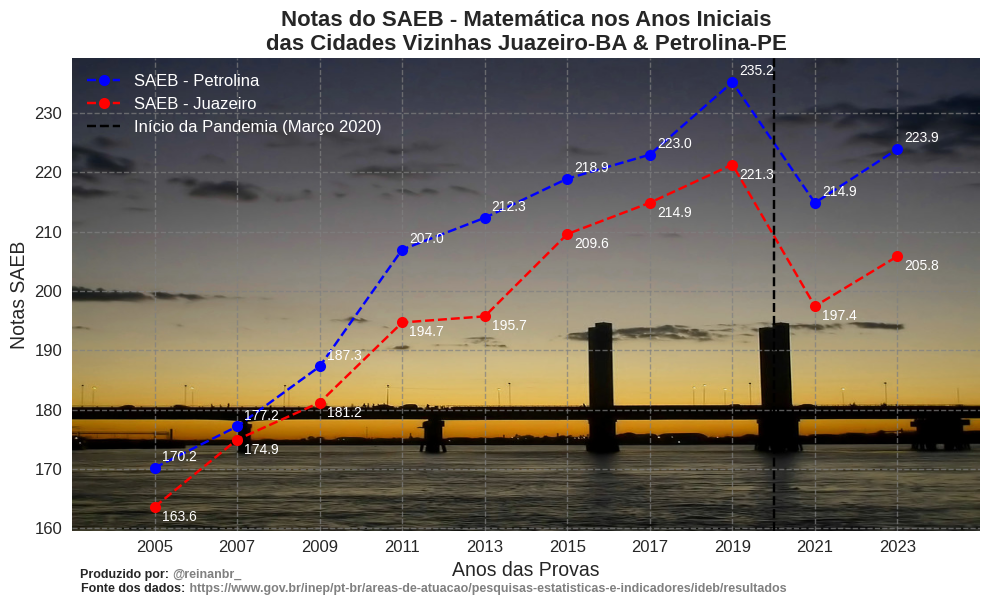

In [118]:
import matplotlib.image as mpimg

# Carregando a imagem
img = mpimg.imread('ponte.jpg')


plt.style.use('seaborn')


plt.figure(figsize=(10, 6))  # Tamanho da figura


plt.imshow(img, aspect='auto', extent=[min(years_saeb)-2, max(years_saeb)+2, min(min(saeb_p)-4, min(saeb_j))-4, max(max(saeb_p)+4, max(saeb_j)+4)], zorder=0)

plt.title("Notas do SAEB - Matemática nos Anos Iniciais\ndas Cidades Vizinhas Juazeiro-BA & Petrolina-PE", fontweight='bold', fontsize=16)
plt.plot(years_saeb, saeb_p, '--o', color='blue', label="SAEB - Petrolina", markersize=8)
plt.plot(years_saeb, saeb_j, '--o', color='red', label="SAEB - Juazeiro", markersize=8)

plt.axvline(x=2020, color='black', linestyle='--', label='Início da Pandemia (Março 2020)')

plt.ylabel("Notas SAEB", fontsize=14)
plt.xlabel("Anos das Provas", fontsize=14)
plt.xticks(years_saeb, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--',color='gray', alpha=0.7)
legend = plt.legend(fontsize=12)
for text in legend.get_texts():
    text.set_color('white') 
plt.tight_layout()  # Ajusta a layout para evitar sobreposição

# Anotações nos pontos
for x, y in zip(years_saeb, saeb_p):
    plt.annotate(f'{y:.1f}', xy=(x, y),color='white', xytext=(5, 5), textcoords='offset points', fontsize=10)

for x, y in zip(years_saeb, saeb_j):
    plt.annotate(f'{y:.1f}', xy=(x, y),color='white', xytext=(5, -10), textcoords='offset points', fontsize=10)
    
plt.text(0.009, -0.1, "Produzido por:",fontweight='bold', fontsize=9, transform=plt.gca().transAxes)
plt.text(0.11, -0.1, "@reinanbr_",color='gray',fontweight='bold', fontsize=9, transform=plt.gca().transAxes)
plt.text(0.01, -0.13, "Fonte dos dados:", fontweight='bold',fontsize=9, transform=plt.gca().transAxes)
plt.text(0.125, -0.13, " https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/ideb/resultados",color="gray", fontweight='bold',fontsize=9, transform=plt.gca().transAxes)

plt.savefig('plot_jp_saeb.png',dpi=800)

/tmp/ipykernel_12496/1802848766.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


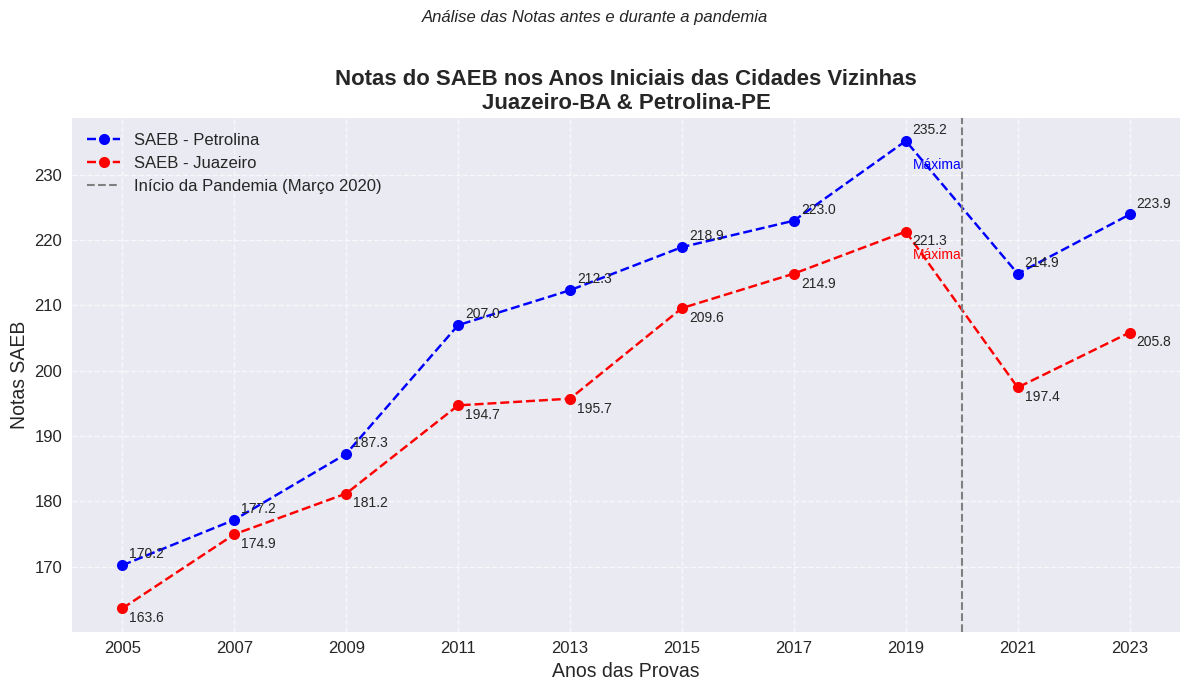

In [66]:
from sklearn.linear_model import LinearRegression



plt.style.use('seaborn')

plt.figure(figsize=(12, 7))  # Tamanho da figura
plt.title("Notas do SAEB nos Anos Iniciais das Cidades Vizinhas\nJuazeiro-BA & Petrolina-PE", fontweight='bold', fontsize=16)
plt.suptitle("Análise das Notas antes e durante a pandemia", fontsize=12, fontstyle='italic')

# Plotando as notas
plt.plot(years_saeb, saeb_p, '--o', color='blue', label="SAEB - Petrolina", markersize=8)
plt.plot(years_saeb, saeb_j, '--o', color='red', label="SAEB - Juazeiro", markersize=8)

# Linha vertical para o início da pandemia
plt.axvline(x=2020, color='grey', linestyle='--', label='Início da Pandemia (Março 2020)', linewidth=1.5)

# Ajustes nos eixos
plt.ylabel("Notas SAEB", fontsize=14)
plt.xlabel("Anos das Provas", fontsize=14)
plt.xticks(years_saeb, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout para evitar sobreposição

# Anotações nos pontos e estatísticas
for x, y in zip(np.array(years_saeb), np.array(saeb_p)):
    plt.annotate(f'{y:.1f}', xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=10)
    if y == np.array(saeb_p).max():
        plt.annotate('Máxima', xy=(x, y), xytext=(5, -20), textcoords='offset points', fontsize=10, color='blue')

for x, y in zip(years_saeb, saeb_j):
    plt.annotate(f'{y:.1f}', xy=(x, y), xytext=(5, -10), textcoords='offset points', fontsize=10)
    if y == np.array(saeb_j).max():
        plt.annotate('Máxima', xy=(x, y), xytext=(5, -20), textcoords='offset points', fontsize=10, color='red')

plt.show()